<a href="https://colab.research.google.com/github/freedom73011/Python-01/blob/main/ch13%E4%BA%BA%E5%8A%9B%E9%8A%80%E8%A1%8C%E7%B6%B2%E7%AB%99%E6%B1%82%E8%81%B7%E5%B0%8F%E5%B9%AB%E6%89%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 篩選文字欄位資料

In [ ]:
import pandas as pd

columns = ['姓名', '班級']
data = [['林大和','一年甲班'], ['張小明','一年乙班'], ['林美麗','一年乙班'],
        ['鄭中林','二年甲班'], ['林品朋','二年甲班'], ['陳明朋','二年乙班']]
df = pd.DataFrame(data, columns=columns)
df

,姓名,班級
0,林大和,一年甲班
1,張小明,一年乙班
2,林美麗,一年乙班
3,鄭中林,二年甲班
4,林品朋,二年甲班
5,陳明朋,二年乙班


In [ ]:
# 精確比對篩選
df1 = df[df['班級']=='二年甲班']
df1

,姓名,班級
3,鄭中林,二年甲班
4,林品朋,二年甲班


In [ ]:
# 模糊比對篩選
df2 = df[df['姓名'].str.contains('林')]
df2

,姓名,班級
0,林大和,一年甲班
2,林美麗,一年乙班
3,鄭中林,二年甲班
4,林品朋,二年甲班


In [ ]:
# 多重條件篩選
df3 = df[(df['姓名'].str.contains('林')) & \
         (df['班級'].str.contains('一年'))]
df3

,姓名,班級
0,林大和,一年甲班
2,林美麗,一年乙班


In [ ]:
import requests, math
from bs4 import BeautifulSoup
import pandas as pd

# df = []
baseurl = 'https://www.1111.com.tw/search/job?ks=電腦&page='  #電腦

#取得總資料數
html = requests.get(baseurl + '1')
soup = BeautifulSoup(html.text, 'lxml')
tem = soup.find('div', class_='srh-result-count nav_item job_count')
jobn = int(tem.get('data-count').replace(',', ''))
jobn

14957

In [ ]:
joball = soup.find_all('div', class_='body-wrapper')
job = joball[0]
job

<div class="body-wrapper"><div class="job_item_profile"><div class="profile-image" style="background-image:url('//www.1111.com.tw/oad/8325568.jpg');"></div><div class="badge item-thumb happiness-hidd"><a href="https://happiness.1111.com.tw/2022event/vote/vote.asp?organ_no=8325568" target="_blank"><span aria-label="">幸福企業</span></a></div></div><div class="job_item_info"><div class="job_item_badge_mobile_show"><div class="badge_group"></div></div><a href="/job/98792928/" target="_blank"><h5 class="card-title title_6">PK0601 電源研發設計主任(工作地點:高雄市)</h5></a><div class="card-subtitle mb-4 text-muted happiness-hidd"><a href="/corp/8325568/" target="_blank" title="《公司名稱》仁寶電腦工業股份有限公司
《行業類別》電腦╱週邊設備製造
《公司住址》台北市內湖區瑞光路"><h6 class="job_item_company mb-1 digit_5 body_3">仁寶電腦工業股份有限公司 | 電腦╱週邊設備製造</h6></a><div class="job_item_detail d-flex body_4"><a href="?c0=101801" target="_blank" title="搜尋更多高雄市新興區工作">高雄市新興區</a><div class="job_item_detail_salary ml-3 font-weight-style digit_6">面議（經常性薪資達 4 萬元或以上）</div></d

In [ ]:
jobinfo = job[j].find('div', class_='job_item_info')

In [ ]:
work = jobinfo.find('h5').text
work

'PA0605 伺服器專案經理(理級)(內湖)'

In [ ]:
site = jobinfo.find('a').get('href')  #工作網址
site

'/job/113120499/'

In [ ]:
title = jobinfo.find('div', class_='card-subtitle mb-4 text-muted happiness-hidd').find('a').get('title')
tlist = title.split('\n')
company = tlist[0].replace('《公司名稱》', '')  #公司名稱
companysort = tlist[1].replace('《行業類別》', '')  #公司類別
area = tlist[2].replace('《公司住址》', '')  #工作地點
print(company)
print(companysort)
print(area)

仁寶電腦工業股份有限公司
電腦╱週邊設備製造
台北市內湖區瑞光路


In [ ]:
salary = jobinfo.find('div', class_='job_item_detail_salary ml-3 font-weight-style digit_6').text  #薪資
salary

'面議（經常性薪資達 4 萬元或以上）'

In [ ]:
content = jobinfo.find('p', class_='card-text job_item_description body_4').text  #其他事項
content

'1.產品開發時程規劃與管控 \n2.專案成本分析及管控 \n3.協助各階段新產品導入及量產生產端協調整合\n\n***依學、經歷敘薪 ***'

In [ ]:
person = jobinfo.find('span', class_='applicants_data').text  #應徵人數
person

'1-5人'

# 擷取電腦相關行業職缺資料

In [ ]:
import requests, math
from bs4 import BeautifulSoup
import pandas as pd

df = []
baseurl = 'https://www.1111.com.tw/search/job?ks=電腦&page='  #電腦

#取得總資料數
html = requests.get(baseurl + '1')
soup = BeautifulSoup(html.text, 'lxml')
tem = soup.find('div', class_='srh-result-count nav_item job_count')
jobn = int(tem.get('data-count').replace(',', ''))
if jobn > 1500:  #最多取1500筆資料
    jobn = 1500
page = math.ceil(jobn/20)
# 逐頁讀取資料
for i in range(page):
    url = baseurl + str(i+1)
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'lxml')
    job = soup.find_all('div', class_='body-wrapper')
    if (i+1)*20 > jobn:
        count = jobn - i*20
    else:
        count = 20
    for j in range(count):
        try:
            jobinfo = job[j].find('div', class_='job_item_info')
            work = jobinfo.find('h5').text  #職務名稱
            site = jobinfo.find('a').get('href')  #工作網址
            title = jobinfo.find('div', class_='card-subtitle mb-4 text-muted happiness-hidd').find('a').get('title')
            tlist = title.split('\n')
            company = tlist[0].replace('《公司名稱》', '')  #公司名稱
            companysort = tlist[1].replace('《行業類別》', '')  #公司類別
            area = tlist[2].replace('《公司住址》', '')  #工作地點
            salary = jobinfo.find('div', class_='job_item_detail_salary ml-3 font-weight-style digit_6').text  #薪資
            person = jobinfo.find('span', class_='applicants_data').text  #應徵人數
            content = jobinfo.find('p', class_='card-text job_item_description body_4').text  #其他事項
            dfmono = pd.DataFrame([{'職務名稱':work,
                                  '工作網址': site,
                                  '公司名稱': company,
                                  '公司類別': companysort,
                                  '工作地點':area,
                                  '薪資':salary,
                                  '應徵人數':person,
                                  '其他事項':content }],
                                  )
            df.append(dfmono)
        except:
            pass
    print('處理第 ' + str(i+1) + ' 頁完畢！')
df = pd.concat(df, ignore_index=True)
df.to_excel('1111data.xlsx', index=0)  #存為excel檔

# 統計六都職缺數量分布

In [ ]:
# 取得字串中所有數值
import re
list1 = re.findall(r"\d+\.?\d*", "共有20人")
print('list1:', list1)
list2 = re.findall(r"\d+\.?\d*", "共有20~30人")
print('list2:', list2)

list1: ['20']
list2: ['20', '30']


In [ ]:
# 下載翰字鑄造-台北黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

台北    1586
新北    1226
桃園     716
台中     150
台南      55
高雄     425
dtype: int64


<Axes: title={'center': '六都電腦職缺數量'}>

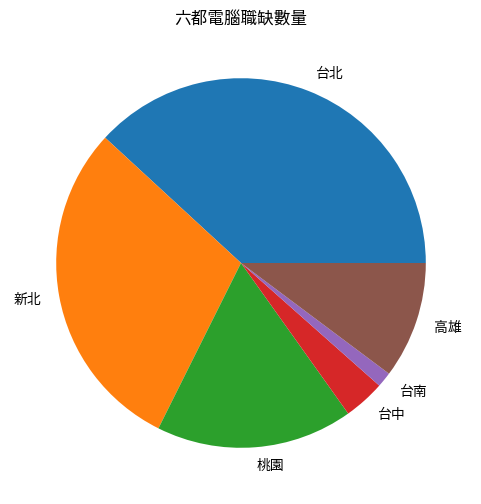

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

df = pd.read_excel('1111data.xlsx')
city = ['台北', '新北', '桃園', '台中', '台南', '高雄']  #六都
citycount = []  #存六都工作職缺數量的串列
for i in range(len(city)):
    df1 = df[df['工作地點'].str.contains(city[i])]  #取出包含指定地點的資料
    indexlist = df1.index  #取得資料索引
    total = 0  #職缺總額
    for j in range(len(df1)):
        personnum = re.findall(r"\d+\.?\d*",df1['應徵人數'][indexlist[j]])  #取出資料中的數值
        if len(personnum) == 1:  #若是1個數值即為人數
            person = int(personnum[0])
        else:  #若是2個數值則取平均數
            person =int((int(personnum[0])+int(personnum[1]))/2)
        total += person
    citycount.append(total)

ser = pd.Series(citycount, index=city)  #串列轉Series
print(ser)
plt.axis('off')
ser.plot(kind='pie', title='六都電腦職缺數量', figsize=(6, 6))  #繪製圓餅圖

# 統計六都平均薪資金額

台北    37375
新北    64206
桃園    38609
台中    36834
台南    30947
高雄    32612
dtype: int64


<Axes: title={'center': '六都電腦職缺薪資'}, ylabel='單位：元'>

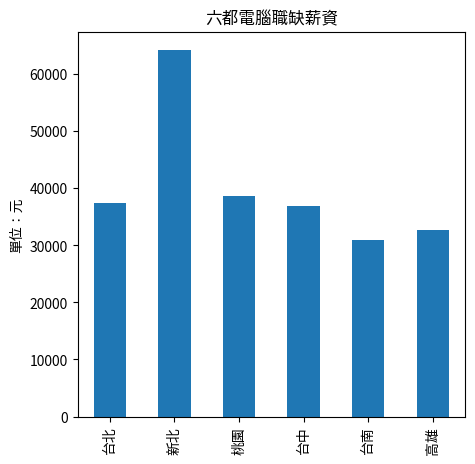

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

def transfer(strSalary):  #轉換薪資為月薪，單位為「元」
    sal = float(strSalary)
    if sal < 20:  #薪資單位為「萬」
        sal = sal * 10000
    elif sal <300:  #時薪
        sal = sal * 8 * 22
    return sal

# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

df = pd.read_excel('1111data.xlsx')
city = ['台北', '新北', '桃園', '台中', '台南', '高雄']  #六都
salarylist = []
for i in range(len(city)):
    df1 = df[(df['工作地點'].str.contains(city[i]))]
    indexlist = df1.index  #取得資料索引
    total = 0  #薪資總額
    for j in range(len(df1)):
        salarytem = df1['薪資'][indexlist[j]].replace(',', '')  #以資料索引取得資料
        salanum = re.findall(r"\d+\.?\d*",salarytem)  #取出資料中的數值
        if len(salanum) == 1:  #若是1個數值即為薪資
            salary = transfer(salanum[0])
        else:  #若是2個數值則取平均數
            salary = (transfer(salanum[0])+transfer(salanum[1]))/2
        total += salary
    salarycity = int(total/len(df1))  #平均薪資
    salarylist.append(salarycity)

ser = pd.Series(salarylist, index=city)  #串列轉Series
print(ser)
plt.ylabel('單位：元')
ser.plot(kind='bar', title='六都電腦職缺薪資', figsize=(5, 5))  #繪製長條圖